In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [88]:
df = pd.read_csv("Datasets/test_dataset_2.csv")
df

,ProductID,ProductName,Category,Price,QuantitySold,TotalSales,ReviewRating,ReviewText,OrderDate
0,1,Wireless Headphones,Electronics,59.99,150,8998.50,5,Absolutely love this product! Exceeded all my ...,12-02-2023
1,2,Organic Green Tea,Beverages,14.99,200,2998.00,4,"Very good, but there's room for improvement.",14-02-2018
2,3,Yoga Mat,Sports,24.99,120,2998.80,4,"Great product, but could use some enhancements.",09-08-2016
3,4,LED Desk Lamp,Home,39.99,80,3199.20,3,"Average quality, expected a bit more for the p...",17-06-2018
4,5,Smartphone Stand,Accessories,9.99,300,2997.00,2,"Below average quality, wouldn't recommend it.",08-01-2018
...,...,...,...,...,...,...,...,...,...
1005,1006,Product 1006,Kitchen,144.68,161,23293.48,2,"Below average quality, wouldn't recommend it.",18-03-2020
1006,1007,Product 1007,Toys,139.81,314,43900.34,1,Waste of money. The product broke within days.,26-10-2015
1007,1008,Product 1008,Sports,64.03,74,4738.22,5,Absolutely love this product! Exceeded all my ...,11-10-2016
1008,1009,Product 1009,Books,47.67,79,3765.93,5,A must-have item for everyone. Highly recommen...,30-01-2016


In [89]:
df = df.loc[:, ["OrderDate", "TotalSales"]]
df

,OrderDate,TotalSales
0,12-02-2023,8998.50
1,14-02-2018,2998.00
2,09-08-2016,2998.80
3,17-06-2018,3199.20
4,08-01-2018,2997.00
...,...,...
1005,18-03-2020,23293.48
1006,26-10-2015,43900.34
1007,11-10-2016,4738.22
1008,30-01-2016,3765.93


In [90]:
df['OrderDate'] = pd.to_datetime(df['OrderDate'], format= "%d-%m-%Y", errors='coerce')

In [91]:
df.set_index('OrderDate', inplace=True)
df = df.resample('Y').sum()
df

C:\Users\ritu1\AppData\Local\Temp\ipykernel_20860\954352590.py:2: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  df = df.resample('Y').sum()


,TotalSales
OrderDate,
2014-12-31,2102894.56
2015-12-31,2333652.15
2016-12-31,2357794.16
2017-12-31,2052786.71
2018-12-31,2031898.97
2019-12-31,2050317.58
2020-12-31,1995841.98
2021-12-31,2131705.30
2022-12-31,1921259.90


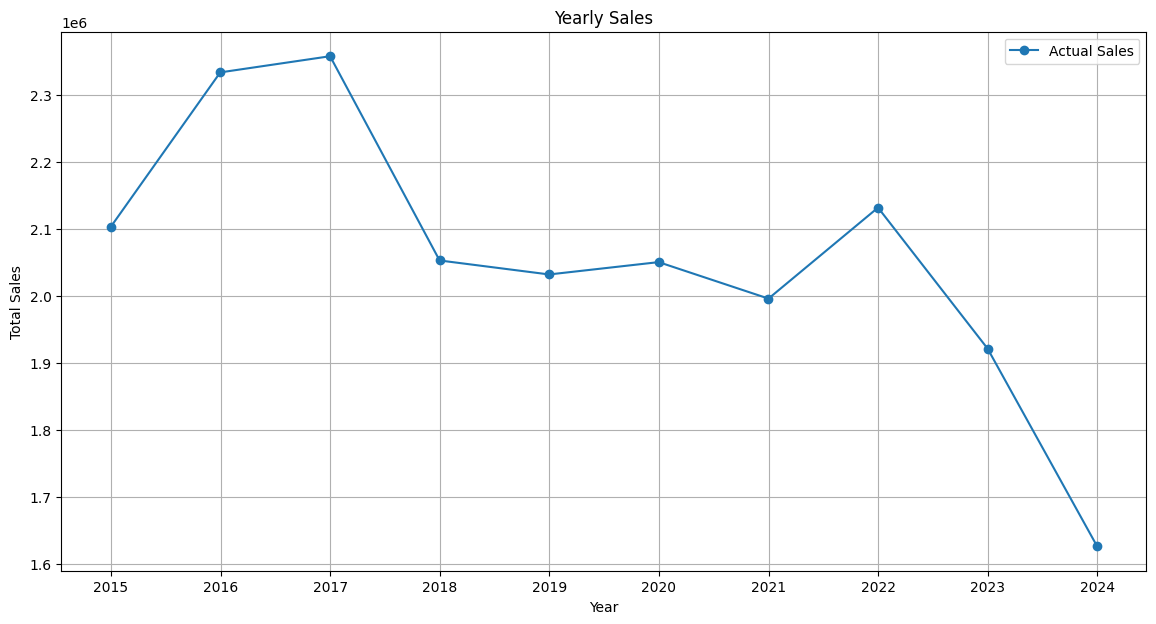

In [92]:
plt.figure(figsize=(14, 7))
plt.plot(df.index, df['TotalSales'], label='Actual Sales', marker='o')
plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.title('Yearly Sales')
plt.legend()
plt.grid(True)
plt.show()

In [93]:
from statsmodels.tsa.stattools import adfuller
adf,pvalue,usedlag,nobs,critical_values,icbest = adfuller(df["TotalSales"].dropna())
print("adf: ", adf)
print("p-value: ", pvalue)
print("critical values: ", critical_values)

adf:  -0.414202456148075
p-value:  0.9077003328581355
critical values:  {'1%': -4.473135048010974, '5%': -3.28988060356653, '10%': -2.7723823456790124}


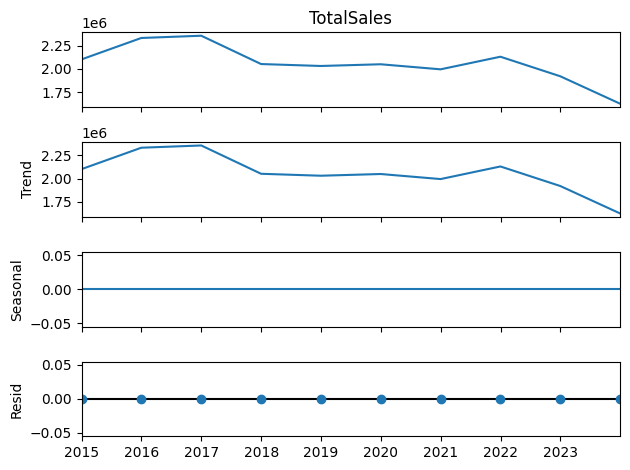

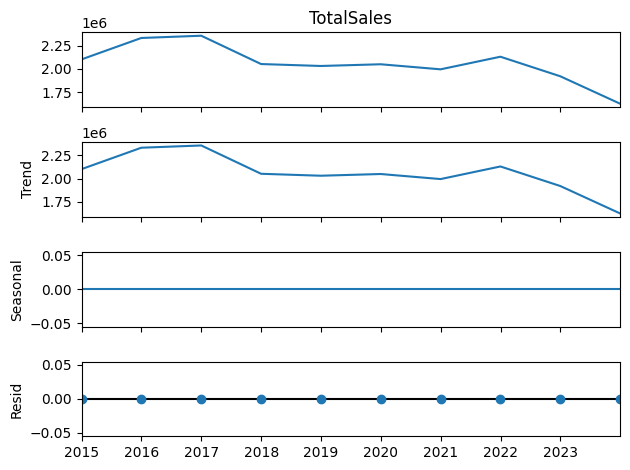

In [94]:
from statsmodels.tsa.seasonal import seasonal_decompose
decompose_data = seasonal_decompose(df["TotalSales"], model='additive')
decompose_data.plot()

In [95]:
df1 = df.diff().dropna()

In [96]:
df1

,TotalSales
OrderDate,
2015-12-31,230757.59
2016-12-31,24142.01
2017-12-31,-305007.45
2018-12-31,-20887.74
2019-12-31,18418.61
2020-12-31,-54475.60
2021-12-31,135863.32
2022-12-31,-210445.40
2023-12-31,-295200.49


In [97]:
adf,pvalue,usedlag,nobs,critical_values,icbest = adfuller(df1)
print("adf: ", adf)
print("p-value: ", pvalue)
print("critical values: ", critical_values)

adf:  -2.447733739847252
p-value:  0.12871446126551567
critical values:  {'1%': -4.6651863281249994, '5%': -3.3671868750000002, '10%': -2.802960625}


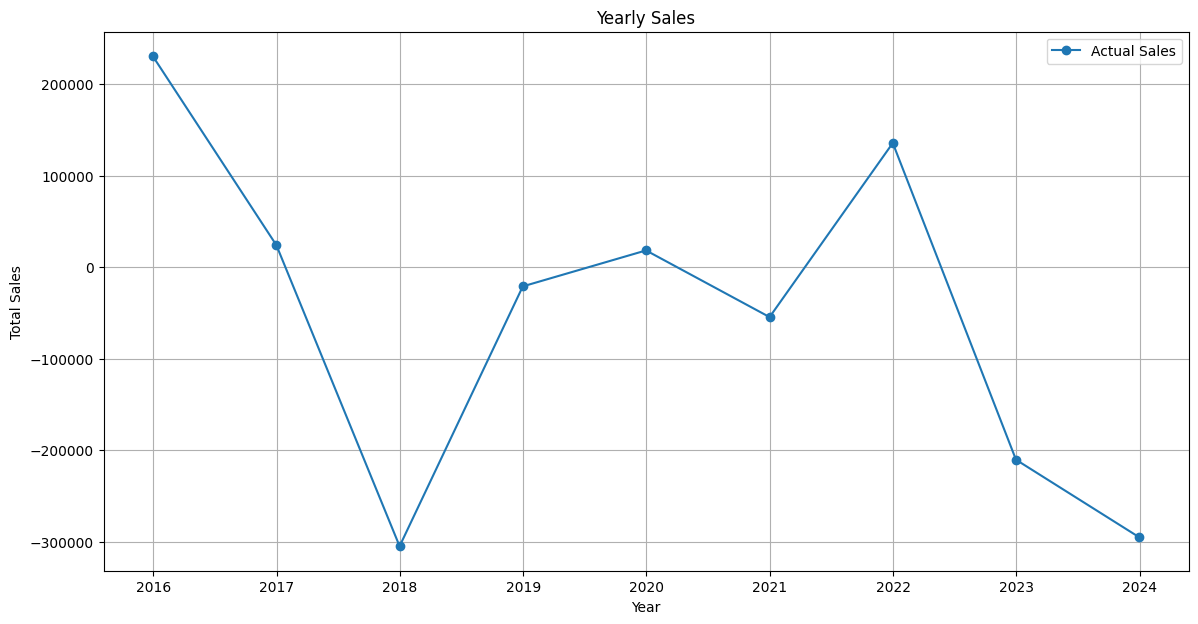

In [98]:
plt.figure(figsize=(14, 7))
plt.plot(df1.index, df1['TotalSales'], label='Actual Sales', marker='o')
plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.title('Yearly Sales')
plt.legend()
plt.grid(True)
plt.show()

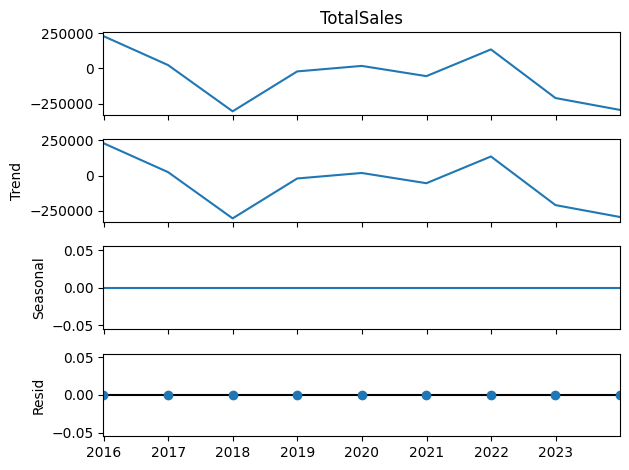

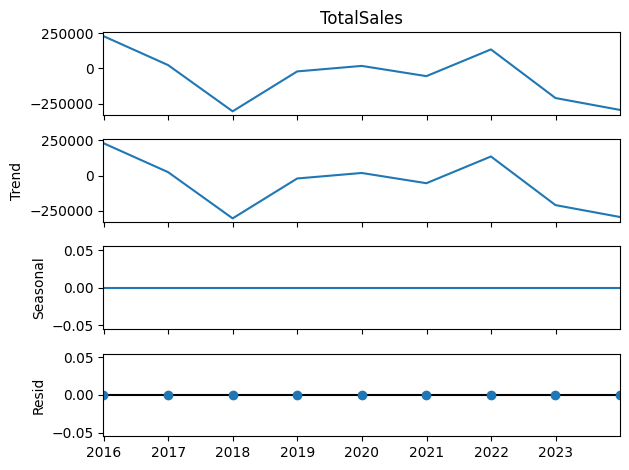

In [99]:
decompose_data = seasonal_decompose(df1["TotalSales"], model='additive')
decompose_data.plot()

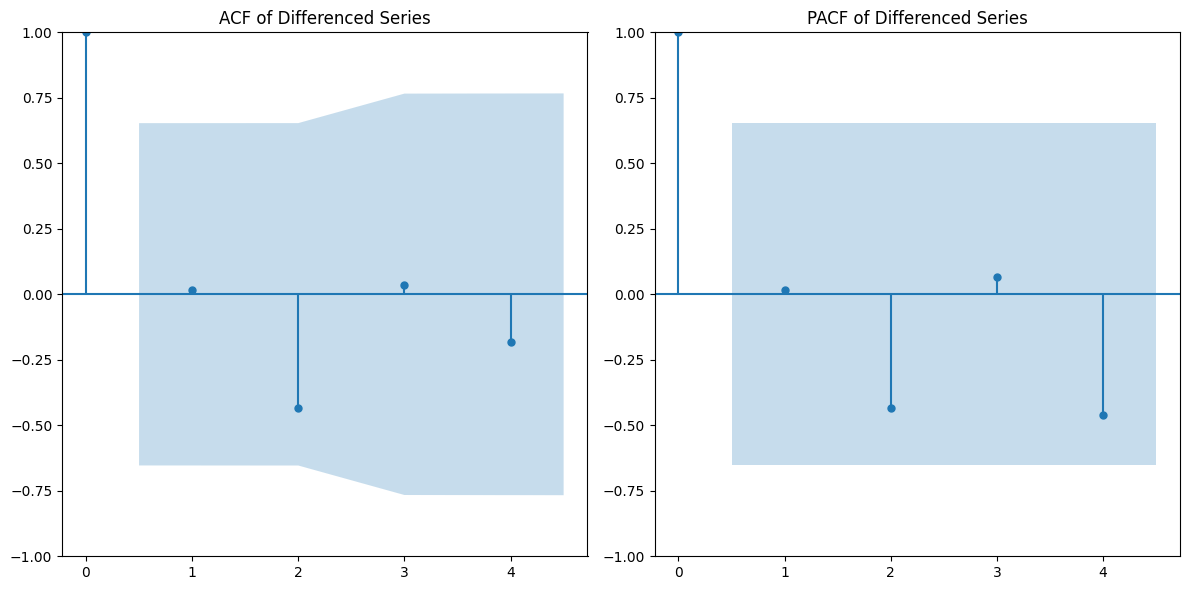

In [100]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import statsmodels.api as sm
import warnings
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plot_acf(df1, lags=4, ax=plt.gca())
plt.title('ACF of Differenced Series')

plt.subplot(1, 2, 2)
plot_pacf(df1, lags=4, ax=plt.gca())
plt.title('PACF of Differenced Series')

plt.tight_layout()
plt.show()

In [101]:
train_size = int(len(df)*0.8)
train, test = df[:train_size], df[train_size:]

In [102]:
# history = [x for x in train]

In [83]:
# predictions = []

In [131]:
from statsmodels.tsa.arima_model import ARIMA
model = sm.tsa.arima.ARIMA(df, order=(1,1,1))
model = model.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:             TotalSales   No. Observations:                   10
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -120.852
Date:                Thu, 15 Aug 2024   AIC                            247.704
Time:                        13:18:37   BIC                            248.296
Sample:                    12-31-2014   HQIC                           246.427
                         - 12-31-2023                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0535      9.146      0.006      0.995     -17.873      17.980
ma.L1          0.0594      8.584      0.007      0.994     -16.766      16.884
sigma2      2.764e+10   1.59e-09   1.74e+19      0.000    2.76e+10    2.76e+10
===================================================================================
Ljung-Box (L1) (Q):                   0.19   Jarque-Bera (JB):                 0.75
Prob(Q):                              0.66   Prob(JB):                         0.69
Heteroskedasticity (H):               1.53   Skew:                            -0.37
Prob(H) (two-sided):                  0.74   Kurtosis:                         1.79
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.3e+37. Standard errors may be unstable.
"""

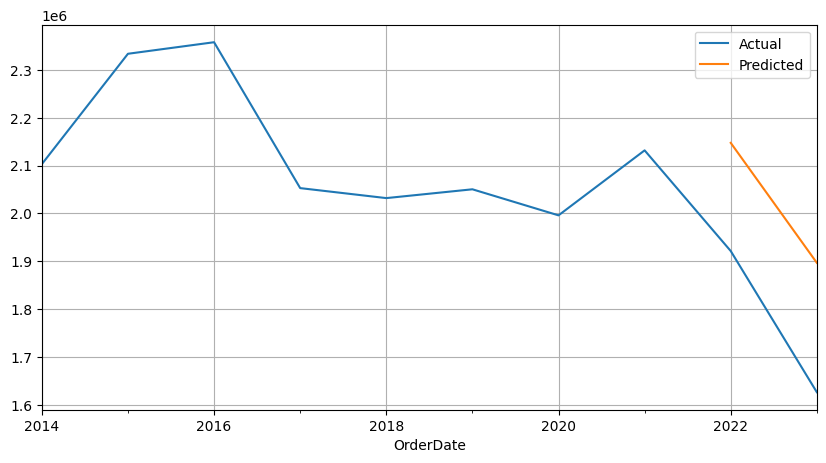

In [132]:
pred = model.predict(start = len(train), end = len(df)-1)
df.plot(figsize = (10,5))
pred.plot(figsize = (10,5))
plt.grid()
plt.legend(['Actual','Predicted'])
plt.show()

In [133]:
# from prophet import Prophet

In [134]:
# data = pd.DataFrame()
# data['y'] = df['TotalSales']  # Observed value column
# data = data.reset_index()
# data = data.rename(columns={'OrderDate': 'ds'})
# data

In [135]:
# m = Prophet()
# m.fit(data)

In [136]:
# future = m.make_future_dataframe(periods=0)
# forecast = m.predict(future)

In [137]:
# m.plot(forecast)

In [138]:
future_dates = pd.date_range(start=df.index[-1], periods=5, freq='Y')
yearly_forecast = model.predict(start=len(df), end=len(df)+5, dynamic=True)
yearly_forecast

C:\Users\ritu1\AppData\Local\Temp\ipykernel_20860\683793963.py:1: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  future_dates = pd.date_range(start=df.index[-1], periods=5, freq='Y')


2024-12-31    1.594209e+06
2025-12-31    1.592506e+06
2026-12-31    1.592415e+06
2027-12-31    1.592410e+06
2028-12-31    1.592410e+06
2029-12-31    1.592410e+06
Freq: YE-DEC, Name: predicted_mean, dtype: float64

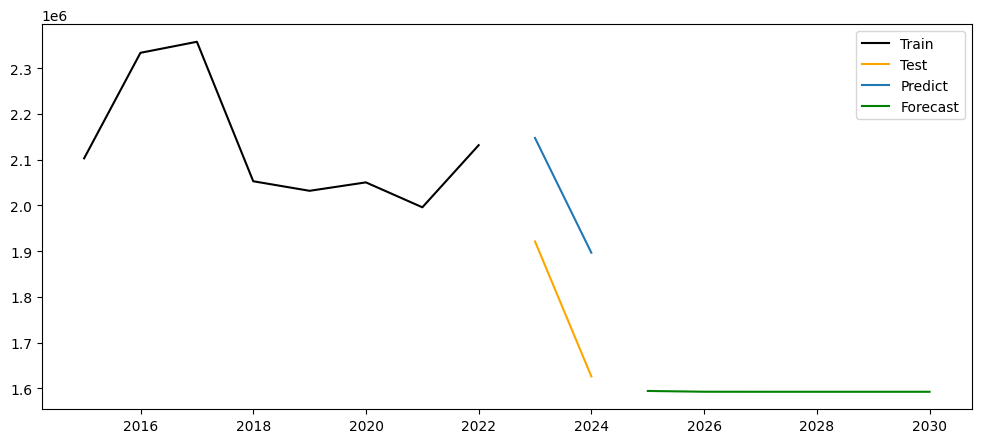

In [139]:
plt.figure(figsize=(12,5))
plt.plot(train, label='Train',color="black")
plt.plot(test, label='Test',color="orange")
plt.plot(pred, label='Predict')

plt.plot(yearly_forecast, label='Forecast',color="Green")
plt.legend()
plt.show()